In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.head()
len(data)

25000

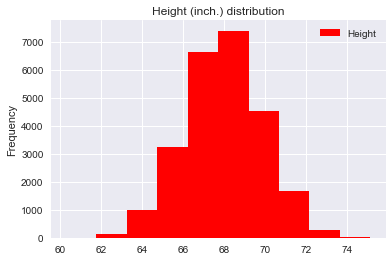

In [3]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


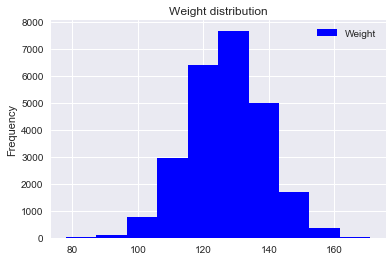

In [5]:
data.plot(y='Weight', kind='hist', color='blue', title='Weight distribution')

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

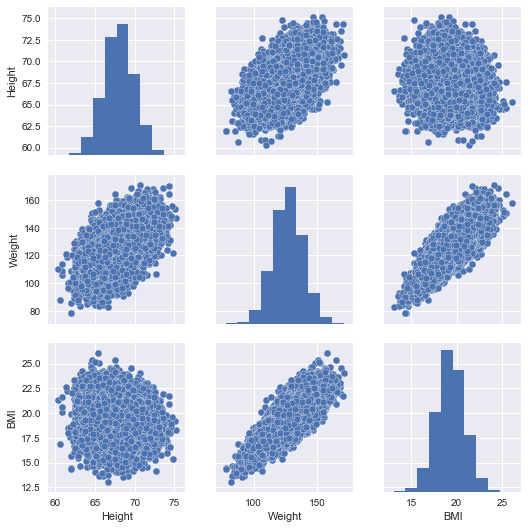

In [8]:
sns.pairplot(data)

In [9]:
def weight_category(weight):
    pass
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    else:
        return 2
    # Ваш код здесь

data['weight_cat'] = data['Weight'].apply(weight_category)
# Ваш код здесь

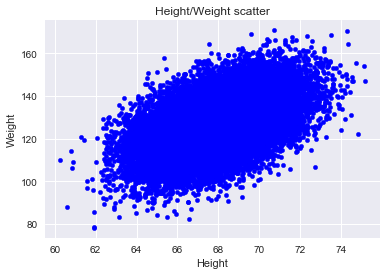

In [10]:
data.plot(x='Height', y='Weight', kind='scatter', color='blue', title='Height/Weight scatter')

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

In [11]:
def square_error(w1, w0):
    return sum((y - (w0 + w1 * x))**2 for y, x in zip(data['Height'], data['Weight']))

square_error(2, 1)

888347706.9984988

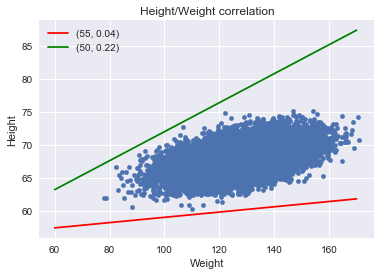

In [12]:
def y1(x):
    return 55 + 0.04 * x

def y2(x):
    return 50 + 0.22 * x

data.plot(x='Weight', y='Height', kind='scatter', title='Height/Weight correlation')
x = np.linspace(60, 170)
plt.plot(x, y1(x), color='red')
plt.plot(x, y2(x), color='green')

plt.legend( ('(55, 0.04)', '(50, 0.22)') );

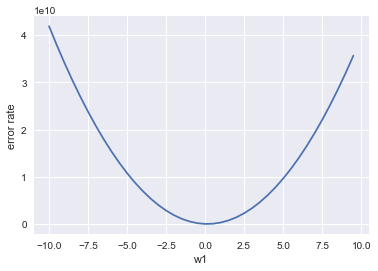

In [13]:
w0 = 50.0
x = list(np.arange(-10.0, 10.0, 0.5))
error_graph = [square_error(w1, w0) for w1 in x]
plt.plot(x, error_graph)
plt.ylabel('error rate')
plt.xlabel('w1')
plt.show()

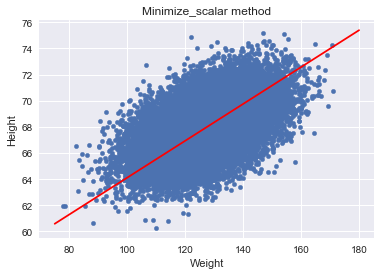

In [14]:
import scipy.optimize
from scipy.optimize import minimize_scalar
w0 = 50.0
w1_optimal = minimize_scalar(square_error, bounds=(-5,5), args=(w0))

def y(x):
    return 50 + w1_optimal.x * x
x = np.linspace(75, 180)
data.plot(x='Weight', y='Height', kind='scatter', title='Minimize_scalar method')
plt.plot(x, y(x),color='red');

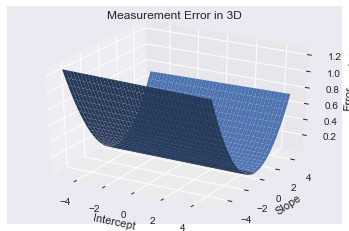

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
Z = square_error(w1, w0)

surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
ax.set_title('Measurement Error in 3D')
plt.show();

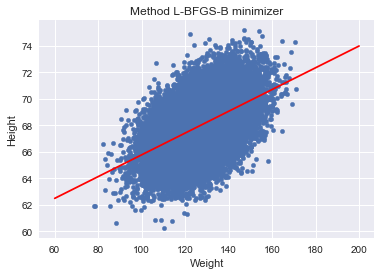

In [16]:
from scipy.optimize import minimize

def y_(w):
    return square_error(w[1], w[0])

w_optimal = minimize(y_, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))

w0_opt = w_optimal.x[0]
w1_opt = w_optimal.x[1]
    
def y(x):
    return w0_opt + w1_opt * x
    
x = np.linspace(60, 200)
data.plot(x='Weight', y='Height', kind='scatter', title='Method L-BFGS-B minimizer')
plt.plot(x, y(x),color='red');